# Practica de Visualización

Un dataset de NOAA está almacenado en el archivo `data/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. Este es el dataset que utilizaremos para la práctica.

Nota: Los datos para esta práctica forman parte de un dataset perteneciente a The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). El GHCN-Daily se compone de registros climáticos diarios de miles de estaciones de la superficie terrestre en todo el mundo.

Cada fila en el archivo de datos corresponde a una sola observación.

Nos proporciona las siguientes variables:

- **id** : código de identificación de la estación
- **date** : fecha en formato YYYY-MM-DD (por ejemplo: 2012-01-24 = 24 de enero de 2012)
- **element** : indica el tipo de medición
    - **TMAX** : Temperatura máxima
    - **TMIN** : Temperatura mínima
- **value**: valor de la temperatura (en décimas de grados centígrados)

## Indicaciones

1. Lee la documentación y familiarícese con el conjunto de datos, luego escriba un código python que arroje un gráfico lineal de las temperaturas máximas y mínimas récord por día del año durante el período 2005-2014. El área entre las temperaturas máximas y mínimas récord de cada día debe estar sombreada.
2. Superponga una dispersión de los datos de 2015 para cualquier punto (máximos y mínimos) para los cuales se superó el récord de diez años (2005-2014) máximo o mínimo histórico en 2015.
3. Debes tener cuidado con los días bisiestos (es decir, el 29 de febrero), es totalmente razonable eliminar estos puntos del conjunto de datos para esta visualización.
4. ¡Haz que la imagen sea agradable! Considera problemas como leyendas, etiquetas y líneas en demasía.

Los datos proporcionados están cerca de **Ann Arbor, Michigan, Estados Unidos**.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

In [111]:
df = pd.read_csv('../data/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
df

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106
...,...,...,...,...
165080,USC00205822,2015-06-09,TMAX,256
165081,USC00205822,2009-10-06,TMAX,167
165082,USC00205050,2014-07-14,TMAX,283
165083,USC00200230,2006-11-29,TMIN,117


In [112]:
df['date'] = pd.to_datetime(df['Date'])  # Para convertir los datos de 'Date' en formato fecha
df['date']

0        2014-11-12
1        2009-04-29
2        2008-05-26
3        2005-11-11
4        2014-02-27
            ...    
165080   2015-06-09
165081   2009-10-06
165082   2014-07-14
165083   2006-11-29
165084   2006-09-04
Name: date, Length: 165085, dtype: datetime64[ns]

In [114]:
df['month_day'] = df['date'].dt.strftime('%m-%d')  # Formula para extraer esa fecha en formato MM-DD

In [115]:
df = df[df['month_day'] != '02-29']  # Eliminar el día 02-29, ya que no forma parte de todos los años
df

,ID,Date,Element,Data_Value,date,month_day,month,day
0,USW00094889,2014-11-12,TMAX,22,2014-11-12,11-12,11,12
1,USC00208972,2009-04-29,TMIN,56,2009-04-29,04-29,4,29
2,USC00200032,2008-05-26,TMAX,278,2008-05-26,05-26,5,26
3,USC00205563,2005-11-11,TMAX,139,2005-11-11,11-11,11,11
4,USC00200230,2014-02-27,TMAX,-106,2014-02-27,02-27,2,27
...,...,...,...,...,...,...,...,...
165080,USC00205822,2015-06-09,TMAX,256,2015-06-09,06-09,6,9
165081,USC00205822,2009-10-06,TMAX,167,2009-10-06,10-06,10,6
165082,USC00205050,2014-07-14,TMAX,283,2014-07-14,07-14,7,14
165083,USC00200230,2006-11-29,TMIN,117,2006-11-29,11-29,11,29


In [116]:
df_2005_2014 = df[df['date'].dt.year <= 2014]  # Filtrar los datos entre 2005 y 2014
df_2005_2014

,ID,Date,Element,Data_Value,date,month_day,month,day
0,USW00094889,2014-11-12,TMAX,22,2014-11-12,11-12,11,12
1,USC00208972,2009-04-29,TMIN,56,2009-04-29,04-29,4,29
2,USC00200032,2008-05-26,TMAX,278,2008-05-26,05-26,5,26
3,USC00205563,2005-11-11,TMAX,139,2005-11-11,11-11,11,11
4,USC00200230,2014-02-27,TMAX,-106,2014-02-27,02-27,2,27
...,...,...,...,...,...,...,...,...
165079,USC00202308,2005-03-02,TMIN,-67,2005-03-02,03-02,3,2
165081,USC00205822,2009-10-06,TMAX,167,2009-10-06,10-06,10,6
165082,USC00205050,2014-07-14,TMAX,283,2014-07-14,07-14,7,14
165083,USC00200230,2006-11-29,TMIN,117,2006-11-29,11-29,11,29


In [117]:
# Filtrar las temperaturas máximas para ese rango
max_2005_2014 = df_2005_2014[df_2005_2014['Element'] =='TMAX']
max_2005_2014

,ID,Date,Element,Data_Value,date,month_day,month,day
0,USW00094889,2014-11-12,TMAX,22,2014-11-12,11-12,11,12
2,USC00200032,2008-05-26,TMAX,278,2008-05-26,05-26,5,26
3,USC00205563,2005-11-11,TMAX,139,2005-11-11,11-11,11,11
4,USC00200230,2014-02-27,TMAX,-106,2014-02-27,02-27,2,27
5,USW00014833,2010-10-01,TMAX,194,2010-10-01,10-01,10,1
...,...,...,...,...,...,...,...,...
165073,USC00205563,2005-05-13,TMAX,222,2005-05-13,05-13,5,13
165074,USW00094889,2009-07-09,TMAX,261,2009-07-09,07-09,7,9
165076,USC00205050,2013-09-29,TMAX,261,2013-09-29,09-29,9,29
165081,USC00205822,2009-10-06,TMAX,167,2009-10-06,10-06,10,6


In [118]:
# Agrupar por día (MM-DD) y sacar la máxima temperatura registrada en cada uno
max_record_2005_2014 = max_2005_2014.groupby('month_day')['Data_Value'].max()
max_record_2005_2014

month_day
01-01    156
01-02    139
01-03    133
01-04    106
01-05    128
        ... 
12-27    189
12-28    194
12-29    128
12-30    117
12-31    139
Name: Data_Value, Length: 365, dtype: int64

In [119]:
min_2005_2014 = df_2005_2014[df_2005_2014['Element'] =='TMIN']
min_2005_2014

,ID,Date,Element,Data_Value,date,month_day,month,day
1,USC00208972,2009-04-29,TMIN,56,2009-04-29,04-29,4,29
6,USC00207308,2010-06-29,TMIN,144,2010-06-29,06-29,6,29
8,USW00004848,2007-12-14,TMIN,-16,2007-12-14,12-14,12,14
11,USC00205822,2008-05-29,TMIN,28,2008-05-29,05-29,5,29
12,USC00203712,2008-10-17,TMIN,17,2008-10-17,10-17,10,17
...,...,...,...,...,...,...,...,...
165077,USC00205050,2014-07-14,TMIN,172,2014-07-14,07-14,7,14
165078,USC00200032,2011-06-27,TMIN,144,2011-06-27,06-27,6,27
165079,USC00202308,2005-03-02,TMIN,-67,2005-03-02,03-02,3,2
165083,USC00200230,2006-11-29,TMIN,117,2006-11-29,11-29,11,29


In [120]:
min_record_2005_2014 = min_2005_2014.groupby('month_day')['Data_Value'].min()
min_record_2005_2014

month_day
01-01   -160
01-02   -267
01-03   -267
01-04   -261
01-05   -150
        ... 
12-27   -138
12-28   -166
12-29   -150
12-30   -144
12-31   -150
Name: Data_Value, Length: 365, dtype: int64

In [121]:
df_2015 = df[df['date'].dt.year == 2015]  # Filtrar los datos para 2015
df_2015

,ID,Date,Element,Data_Value,date,month_day,month,day
19,USC00205563,2015-01-03,TMIN,-39,2015-01-03,01-03,1,3
30,USC00203712,2015-03-17,TMAX,189,2015-03-17,03-17,3,17
34,USC00200032,2015-06-06,TMIN,128,2015-06-06,06-06,6,6
46,USW00014833,2015-08-30,TMIN,178,2015-08-30,08-30,8,30
50,USC00202308,2015-08-30,TMIN,156,2015-08-30,08-30,8,30
...,...,...,...,...,...,...,...,...
165054,USC00208080,2015-02-14,TMIN,-211,2015-02-14,02-14,2,14
165056,USC00200228,2015-02-23,TMAX,-11,2015-02-23,02-23,2,23
165059,USC00207312,2015-06-23,TMIN,172,2015-06-23,06-23,6,23
165072,USC00208080,2015-11-14,TMIN,-17,2015-11-14,11-14,11,14


In [122]:
max_2015 = df_2015[df_2015['Element'] =='TMAX']
max_2015

,ID,Date,Element,Data_Value,date,month_day,month,day
30,USC00203712,2015-03-17,TMAX,189,2015-03-17,03-17,3,17
51,USC00205563,2015-01-03,TMAX,22,2015-01-03,01-03,1,3
59,USC00202308,2015-08-30,TMAX,261,2015-08-30,08-30,8,30
126,USC00200032,2015-06-06,TMAX,233,2015-06-06,06-06,6,6
146,USC00208972,2015-04-09,TMAX,67,2015-04-09,04-09,4,9
...,...,...,...,...,...,...,...,...
165007,USC00205451,2015-08-08,TMAX,256,2015-08-08,08-08,8,8
165020,USC00205451,2015-10-02,TMAX,189,2015-10-02,10-02,10,2
165045,USC00200230,2015-03-10,TMAX,94,2015-03-10,03-10,3,10
165056,USC00200228,2015-02-23,TMAX,-11,2015-02-23,02-23,2,23


In [123]:
max_record_2015 = max_2015.groupby('month_day')['Data_Value'].max()
max_record_2015

month_day
01-01     11
01-02     39
01-03     39
01-04     44
01-05     28
        ... 
12-27     83
12-28     61
12-29    100
12-30     67
12-31     17
Name: Data_Value, Length: 365, dtype: int64

In [124]:
min_2015 = df_2015[df_2015['Element'] =='TMIN']
min_2015

,ID,Date,Element,Data_Value,date,month_day,month,day
19,USC00205563,2015-01-03,TMIN,-39,2015-01-03,01-03,1,3
34,USC00200032,2015-06-06,TMIN,128,2015-06-06,06-06,6,6
46,USW00014833,2015-08-30,TMIN,178,2015-08-30,08-30,8,30
50,USC00202308,2015-08-30,TMIN,156,2015-08-30,08-30,8,30
72,USC00200230,2015-04-01,TMIN,-17,2015-04-01,04-01,4,1
...,...,...,...,...,...,...,...,...
165032,USC00205451,2015-10-02,TMIN,72,2015-10-02,10-02,10,2
165038,USC00207312,2015-07-10,TMIN,133,2015-07-10,07-10,7,10
165054,USC00208080,2015-02-14,TMIN,-211,2015-02-14,02-14,2,14
165059,USC00207312,2015-06-23,TMIN,172,2015-06-23,06-23,6,23


In [125]:
min_record_2015 = min_2015.groupby('month_day')['Data_Value'].min()
min_record_2015

month_day
01-01   -133
01-02   -122
01-03    -67
01-04    -88
01-05   -155
        ... 
12-27     -6
12-28    -39
12-29    -39
12-30    -22
12-31    -56
Name: Data_Value, Length: 365, dtype: int64

In [126]:
# Comparar si en 2015 se rompieron récords de temperatura máxima
broken_max = max_record_2015[max_record_2015 > max_record_2005_2014]
broken_max

month_day
02-09     83
04-17    278
05-07    306
05-08    333
05-11    306
05-18    317
07-27    339
07-29    361
08-19    328
09-07    350
09-08    339
09-16    311
09-17    317
09-18    300
09-28    294
09-29    283
10-20    272
11-02    228
11-03    261
11-04    261
11-05    256
11-06    239
11-18    200
12-07    100
12-08    100
12-09    122
12-10    150
12-11    156
12-12    200
12-13    194
12-14    183
12-15    161
12-16    150
12-23    183
12-24    172
12-25    111
12-26    117
Name: Data_Value, dtype: int64

In [127]:
# Comparar si en 2015 se rompieron récords de temperatura mínima
broken_min = min_record_2015[min_record_2015 < min_record_2005_2014]
broken_min

month_day
01-05   -155
01-11   -200
02-03   -238
02-14   -239
02-15   -260
02-16   -294
02-17   -272
02-19   -260
02-20   -343
02-21   -322
02-23   -267
02-24   -272
02-25   -217
02-26   -216
02-27   -288
02-28   -272
03-05   -221
03-06   -255
03-07   -222
03-28   -122
03-29   -111
03-30   -122
04-24    -71
04-25    -50
05-20      0
07-03     72
08-28     56
10-17    -55
10-18    -55
10-19    -61
10-20    -39
11-10    -44
Name: Data_Value, dtype: int64

### Parte 1
Escriba un código python que arroje un gráfico lineal de las temperaturas máximas y mínimas récord por día del año durante el período 2005-2014. El área entre las temperaturas máximas y mínimas récord de cada día debe estar sombreada.

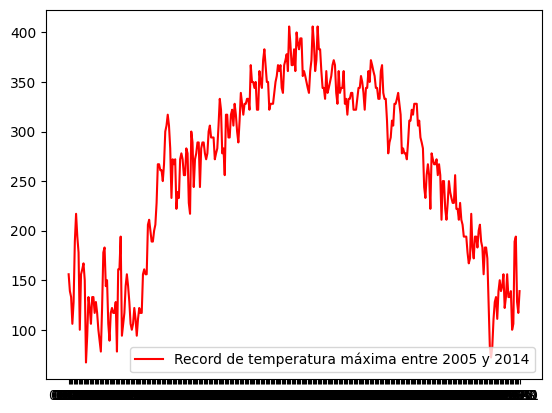

In [128]:
plt.plot(max_record_2005_2014, color='r',
         label='Record de temperatura máxima entre 2005 y 2014' )
plt.legend()

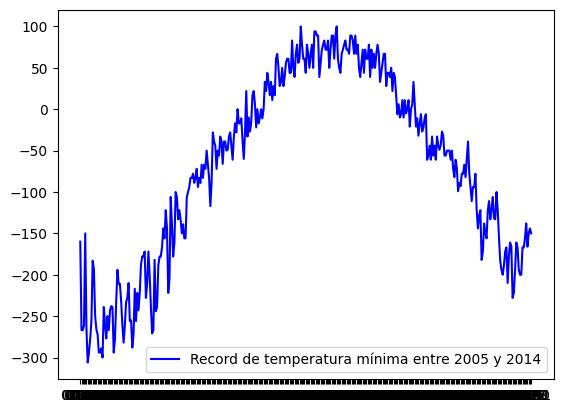

In [129]:
plt.plot(min_record_2005_2014, color='b',
         label='Record de temperatura mínima entre 2005 y 2014' )
plt.legend()

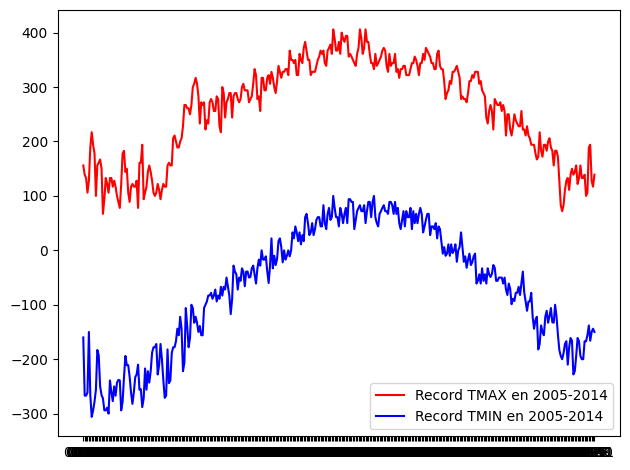

In [139]:
plt.plot(max_record_2005_2014, color='r',
         label='Record TMAX en 2005-2014' )
plt.plot(min_record_2005_2014, color='b',
         label='Record TMIN en 2005-2014' )
plt.legend()
plt.tight_layout()
plt.show()

### Parte 2
Superponga una dispersión de los datos de 2015 para cualquier punto (máximos y mínimos) para los cuales se superó el récord de diez años (2005-2014) máximo o mínimo histórico en 2015.

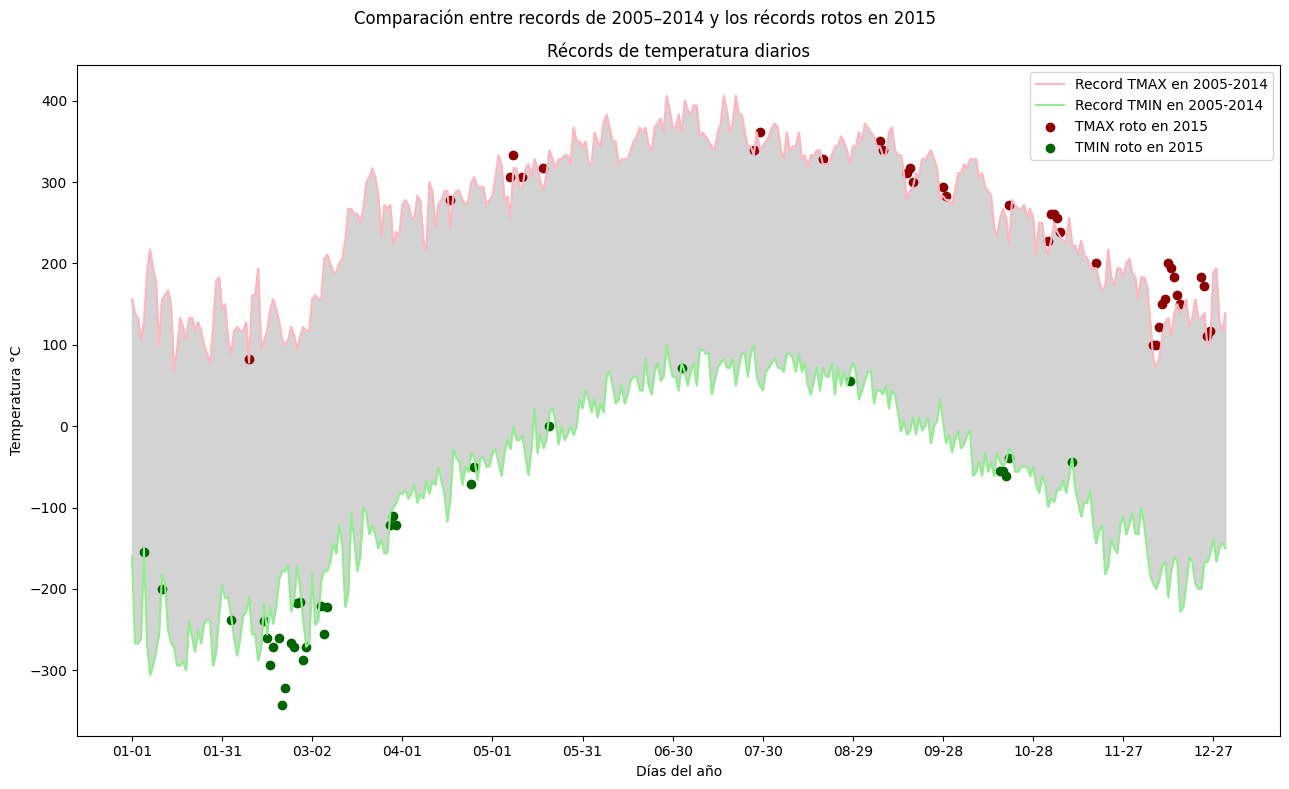

In [162]:
plt.figure(figsize=(13, 8))

plt.fill_between(range(len(max_record_2005_2014)),
                 min_record_2005_2014,
                 max_record_2005_2014,
                 color='lightgray')

plt.plot(max_record_2005_2014, color='lightpink',
         label='Record TMAX en 2005-2014' )
plt.plot(min_record_2005_2014, color='lightgreen',
         label='Record TMIN en 2005-2014' )

plt.scatter(broken_max.index, broken_max.values, marker= 'o', color='darkred', label='TMAX roto en 2015')

plt.scatter(broken_min.index, broken_min.values, marker= 'o', color='darkgreen', label='TMIN roto en 2015')

plt.xticks(range(0, len(max_record_2005_2014), 30))  # Forma de mostrar menos días en el gráfico.
# Inicia en 0, hasta el largo del record, y va de 30 en 30.

plt.legend()
plt.title('Récords de temperatura diarios')
plt.suptitle('Comparación entre records de 2005–2014 y los récords rotos en 2015')
plt.xlabel('Días del año')
plt.ylabel('Temperatura °C')
plt.tight_layout()
plt.show()

## Observaciones...
Según el gráfico se puede observar que los récords de temperatura diaria se rompen con mayor frecuencia en los extremos térmicos. Los puntos rojos se concentran hacia el final del verano en fechas entre el 11-27 y el 12-27, lo que sugiere episodios de calor más intensos. Por otro lado, los puntos azules se ven mayormente al inicio del año indicando mínimos más extremos en invierno.

El hecho de que los récords se rompan en estos momentos del año, puede estar vinculado a fenómenos como olas de calor y fríos más agresivos.